# EDA for Lin Regression Project

In [1]:
import os
import math
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import time

In [2]:
train = pd.read_csv('/Users/jonathanbugg/Desktop/lin_reg_proj/data/train_2016_v2.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('/Users/jonathanbugg/Desktop/lin_reg_proj/data/properties_2016.csv')

/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
prop_trans = pd.merge(train, properties, how = 'left', on = 'parcelid')
prop_trans.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [4]:
data_types = {'airconditioningtypeid' :  'Categorical',
'architecturalstyletypeid' :  'Categorical',
'basementsqft' :  'Numeric',
'bathroomcnt' :  'Numeric',
'bedroomcnt' :  'Numeric',
'buildingqualitytypeid' :  'Ordinal',
'buildingclasstypeid' :  'Categorical',
'calculatedbathnbr' :  'Numeric',
'decktypeid' :  'Categorical',
'threequarterbathnbr' :  'Numeric',
'finishedfloor1squarefeet' :  'Numeric',
'calculatedfinishedsquarefeet' :  'Numeric',
'finishedsquarefeet6' :  'Numeric',
'finishedsquarefeet12' :  'Numeric',
'finishedsquarefeet13' :  'Numeric',
'finishedsquarefeet15' :  'Numeric',
'finishedsquarefeet50' :  'Numeric',
'fips' :  'N/a',
'fireplacecnt' :  'Ordinal',
'fireplaceflag' :  'Categorical',
'fullbathcnt' :  'Numeric',
'garagecarcnt' :  'Numeric',
'garagetotalsqft' :  'Numeric',
'hashottuborspa' :  'Categorical',
'heatingorsystemtypeid' :  'Categorical',
'latitude' :  'N/a',
'longitude' :  'N/a',
'lotsizesquarefeet' :  'Numeric',
'numberofstories' :  'Ordinal',
'parcelid' :  'N/a',
'poolcnt' :  'Categorical',
'poolsizesum' :  'Numeric',
'pooltypeid10' :  'Categorical',
'pooltypeid2' :  'Categorical',
'pooltypeid7' :  'Categorical',
'propertycountylandusecode' :  'N/a',
'propertylandusetypeid' :  'Categorical',
'propertyzoningdesc' :  'Categorical',
'rawcensustractandblock' :  'N/a',
'censustractandblock' :  'N/a',
'regionidcounty' :  'Categorical',
'regionidcity' :  'Categorical',
'regionidzip' :  'Categorical',
'regionidneighborhood' :  'Categorical',
'roomcnt' :  'Numeric',
'storytypeid' :  'Categorical',
'typeconstructiontypeid' :  'Categorical',
'unitcnt' :  'Ordinal',
'yardbuildingsqft17' :  'Numeric',
'yardbuildingsqft26' :  'Numeric',
'yearbuilt' :  'Numeric',
'taxvaluedollarcnt' :  'Numeric',
'structuretaxvaluedollarcnt' :  'Numeric',
'landtaxvaluedollarcnt' :  'Numeric',
'taxamount' :  'Numeric',
#'assessmentyear' :  'Numeric',
'taxdelinquencyflag' :  'Categorical',
'taxdelinquencyyear' :  'Categorical'}

Looking at unique values for each column

In [5]:
def cust_summary_func(series):
    print("------------------------")
    unique_vals = series.unique()
    print(series.name)
    print(unique_vals[:10])
    print(len(unique_vals))
    print(sum(series.isna()))
prop_trans.apply(cust_summary_func)

------------------------
parcelid
[11016594 14366692 12098116 12643413 14432541 11509835 12286022 17177301
 14739064 14677559]
90150
0
------------------------
logerror
[ 0.0276 -0.1684 -0.004   0.0218 -0.005  -0.2705  0.044   0.1638 -0.003
  0.0843]
1894
0
------------------------
transactiondate
['2016-01-01T00:00:00.000000000' '2016-01-02T00:00:00.000000000'
 '2016-01-03T00:00:00.000000000' '2016-01-04T00:00:00.000000000'
 '2016-01-05T00:00:00.000000000' '2016-06-29T00:00:00.000000000'
 '2016-01-06T00:00:00.000000000' '2016-09-12T00:00:00.000000000'
 '2016-06-17T00:00:00.000000000' '2016-01-07T00:00:00.000000000']
352
0
------------------------
airconditioningtypeid
[ 1. nan  5. 13. 11.  9.  3.]
7
61494
------------------------
architecturalstyletypeid
[nan  7.  8.  2. 10.  3. 21.]
7
90014
------------------------
basementsqft
[  nan  814.  330.  168.  671. 1555. 1528.  771.  700.  831.]
40
90232
------------------------
bathroomcnt
[2.  3.5 3.  2.5 4.  1.  5.  5.5 1.5 8. ]
23
0
---

parcelid                        None
logerror                        None
transactiondate                 None
airconditioningtypeid           None
architecturalstyletypeid        None
basementsqft                    None
bathroomcnt                     None
bedroomcnt                      None
buildingclasstypeid             None
buildingqualitytypeid           None
calculatedbathnbr               None
decktypeid                      None
finishedfloor1squarefeet        None
calculatedfinishedsquarefeet    None
finishedsquarefeet12            None
finishedsquarefeet13            None
finishedsquarefeet15            None
finishedsquarefeet50            None
finishedsquarefeet6             None
fips                            None
fireplacecnt                    None
fullbathcnt                     None
garagecarcnt                    None
garagetotalsqft                 None
hashottuborspa                  None
heatingorsystemtypeid           None
latitude                        None
l

In [6]:
prop_trans[['calculatedbathnbr','bathroomcnt', 'fullbathcnt', 'threequarterbathnbr']]

,calculatedbathnbr,bathroomcnt,fullbathcnt,threequarterbathnbr
0,2.0,2.0,2.0,NaN
1,3.5,3.5,3.0,1.0
2,3.0,3.0,3.0,NaN
3,2.0,2.0,2.0,NaN
4,2.5,2.5,2.0,1.0
...,...,...,...,...
90270,1.0,1.0,1.0,NaN
90271,3.0,3.0,3.0,NaN
90272,2.0,2.0,2.0,NaN
90273,2.0,2.0,2.0,NaN


In [13]:
sum_var = 0
for column in prop_trans:
    if data_types.get(column) == 'Categorical':
        print("--------------------------------------")
        print(column)
        print(prop_trans[column].unique()[:10])
        length_var = len(prop_trans[column].unique())
        print(length_var)
        sum_var += length_var

#print(sum_var)

--------------------------------------
airconditioningtypeid
[ 1. nan  5. 13. 11.  9.  3.]
7
--------------------------------------
architecturalstyletypeid
[nan  7.  8.  2. 10.  3. 21.]
7
--------------------------------------
buildingclasstypeid
[nan  4.]
2
--------------------------------------
decktypeid
[nan 66.]
2
--------------------------------------
hashottuborspa
[nan True]
2
--------------------------------------
heatingorsystemtypeid
[ 2. nan  7.  6. 24. 13. 20. 18. 11.  1.]
13
--------------------------------------
poolcnt
[nan  1.]
2
--------------------------------------
pooltypeid10
[nan  1.]
2
--------------------------------------
pooltypeid2
[nan  1.]
2
--------------------------------------
pooltypeid7
[nan  1.]
2
--------------------------------------
propertylandusetypeid
[261. 266. 265. 246. 263. 269. 248. 247. 267. 275.]
14
--------------------------------------
propertyzoningdesc
['LARS' nan 'PSR6' 'LAR3' 'HBR3YY' 'CORH*' 'LARE9' 'LAR1' 'BUR1*' 'LBR4R']
1997
--

In [93]:
pred_columns = []
for column in prop_trans:
    if data_types.get(column) == 'Numeric':
        #print('--------------------------------')
        data_subset = prop_trans[['logerror', column]].dropna()
        y = data_subset['logerror']
        X = sm.add_constant(data_subset[column])
        model = sm.OLS(y, X)
        results = model.fit()
        #print(results.pvalues)
        if results.pvalues[1] < 0.05:
            #print(results.summary())
            pred_columns.append(column)

print(pred_columns)

prop_trans[pred_columns].corr()

/Users/jonathanbugg/Desktop/crypto_portfolio_opt/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'threequarterbathnbr', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxamount']


,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,garagecarcnt,garagetotalsqft,threequarterbathnbr,yearbuilt,structuretaxvaluedollarcnt,taxamount
bathroomcnt,1.000000,0.646120,1.000000,0.477264,0.772553,0.799372,0.984130,0.502429,0.451062,0.260263,0.368061,0.586641,0.461900
bedroomcnt,0.646120,1.000000,0.618060,0.458030,0.632035,0.657599,0.613753,0.432115,0.591496,0.111312,0.040871,0.305405,0.239118
calculatedbathnbr,1.000000,0.618060,1.000000,0.491804,0.801208,0.805475,0.984130,0.479862,0.444418,0.260263,0.369543,0.611665,0.487320
finishedfloor1squarefeet,0.477264,0.458030,0.491804,1.000000,0.703525,0.703593,0.529146,0.461765,0.603777,NaN,0.045581,0.597381,0.511708
calculatedfinishedsquarefeet,0.772553,0.632035,0.801208,0.703525,1.000000,1.000000,0.780325,0.506166,0.604360,0.320113,0.211641,0.716489,0.589022
finishedsquarefeet12,0.799372,0.657599,0.805475,0.703593,1.000000,1.000000,0.782956,0.553059,0.625938,0.319930,0.258530,0.744048,0.612496
fullbathcnt,0.984130,0.613753,0.984130,0.529146,0.780325,0.782956,1.000000,0.454865,0.464446,0.207090,0.322535,0.592410,0.476010
garagecarcnt,0.502429,0.432115,0.479862,0.461765,0.506166,0.553059,0.454865,1.000000,0.641883,0.242854,0.196209,0.473109,0.353114
garagetotalsqft,0.451062,0.591496,0.444418,0.603777,0.604360,0.625938,0.464446,0.641883,1.000000,0.193020,-0.099599,0.430779,0.348345
threequarterbathnbr,0.260263,0.111312,0.260263,NaN,0.320113,0.319930,0.207090,0.242854,0.193020,1.000000,0.075915,0.410387,0.350668


In [90]:
numeric_cols = []
for key, value in data_types.items():
    if value == 'Numeric' and ('squarefeet' in key or 'sqft' in key):
        numeric_cols.append(key)

sqft_corr_df = prop_trans[numeric_cols].corr()
sqft_corr_df

,basementsqft,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,garagetotalsqft,lotsizesquarefeet,yardbuildingsqft17,yardbuildingsqft26
basementsqft,1.000000,0.130140,0.341610,NaN,0.341610,NaN,NaN,-0.031274,0.277500,-0.144900,0.017574,-0.329200
finishedfloor1squarefeet,0.130140,1.000000,0.703525,NaN,0.703593,NaN,0.635206,0.980182,0.603777,0.353168,0.369195,0.271345
calculatedfinishedsquarefeet,0.341610,0.703525,1.000000,1.00000,1.000000,1.000000,1.000000,0.689787,0.604360,-0.048770,0.339667,0.282325
finishedsquarefeet6,NaN,NaN,1.000000,1.00000,NaN,NaN,NaN,NaN,NaN,0.158290,NaN,NaN
finishedsquarefeet12,0.341610,0.703593,1.000000,NaN,1.000000,NaN,NaN,0.689849,0.625938,-0.046706,0.339691,0.284689
finishedsquarefeet13,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.295968,NaN,NaN
finishedsquarefeet15,NaN,0.635206,1.000000,NaN,NaN,NaN,1.000000,0.635206,NaN,0.125495,1.000000,NaN
finishedsquarefeet50,-0.031274,0.980182,0.689787,NaN,0.689849,NaN,0.635206,1.000000,0.587275,0.351778,0.356371,0.343029
garagetotalsqft,0.277500,0.603777,0.604360,NaN,0.625938,NaN,NaN,0.587275,1.000000,0.244853,0.369438,0.339119
lotsizesquarefeet,-0.144900,0.353168,-0.048770,0.15829,-0.046706,0.295968,0.125495,0.351778,0.244853,1.000000,0.173292,0.393110


Looking at bedroom and bathroom metrics to determien which ones highly correlated and maybe should be dropped

In [6]:
numeric_cols = []
for key, value in data_types.items():
    if value == 'Numeric' and ('bath' in key):
        numeric_cols.append(key)

bed_bath_corr = prop_trans[numeric_cols].corr()
bed_bath_corr

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
bathroomcnt,1.000000,1.000000,0.260263,0.98413
calculatedbathnbr,1.000000,1.000000,0.260263,0.98413
threequarterbathnbr,0.260263,0.260263,1.000000,0.20709
fullbathcnt,0.984130,0.984130,0.207090,1.00000


In [9]:
numeric_cols = []
for key, value in data_types.items():
    if value == 'Numeric' and ('value' in key or 'tax' in key):
        numeric_cols.append(key)

doll_corr = prop_trans[numeric_cols].corr()
doll_corr

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
taxvaluedollarcnt,1.000000,0.826052,0.955336,0.949376
structuretaxvaluedollarcnt,0.826052,1.000000,0.623292,0.795014
landtaxvaluedollarcnt,0.955336,0.623292,1.000000,0.902713
taxamount,0.949376,0.795014,0.902713,1.000000


In [11]:
subset = prop_trans[numeric_cols]
subset['sum'] = subset.structuretaxvaluedollarcnt + subset.landtaxvaluedollarcnt
subset

/var/folders/gp/0bstcdf92msf4b130ztx6zs00000gn/T/ipykernel_91328/3053488737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['sum'] = subset.structuretaxvaluedollarcnt + subset.landtaxvaluedollarcnt


,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,sum
0,360170.0,122754.0,237416.0,6735.88,360170.0
1,585529.0,346458.0,239071.0,10153.02,585529.0
2,119906.0,61994.0,57912.0,11484.48,119906.0
3,244880.0,171518.0,73362.0,3048.74,244880.0
4,434551.0,169574.0,264977.0,5488.96,434551.0
...,...,...,...,...,...
90270,191000.0,43800.0,147200.0,2495.24,191000.0
90271,161111.0,117893.0,43218.0,1886.54,161111.0
90272,38096.0,22008.0,16088.0,1925.70,38096.0
90273,165869.0,132991.0,32878.0,2285.57,165869.0


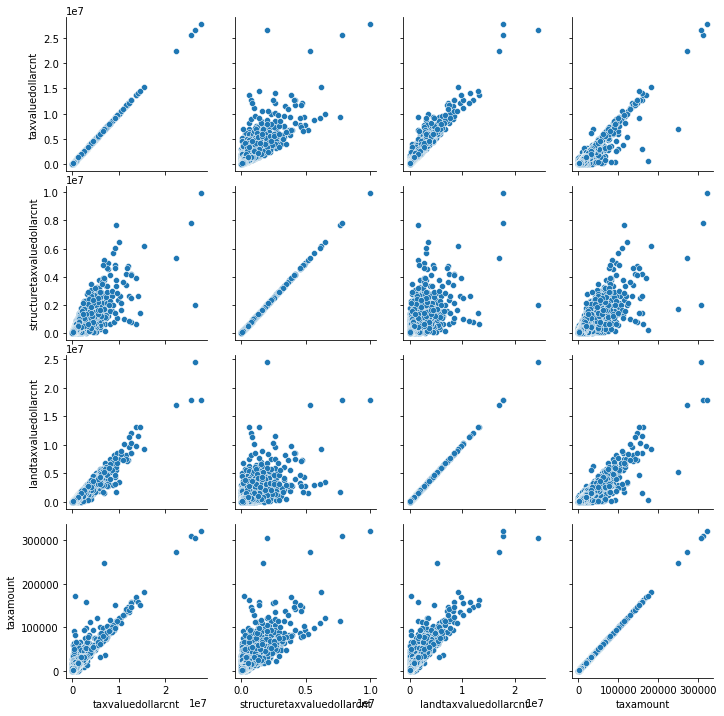

In [87]:
g = sns.PairGrid(prop_trans[numeric_cols])
g.map(sns.scatterplot)